# 特徴選択
・・・データセット内で無関係なものや冗⻑なものを破棄し、最も関連性の⾼い特徴（⼊⼒変数）を識別して保持するプロセス

Why?
- モデルのパフォーマンスを向上
- 過剰適合を軽減
- 解釈可能性を⾼める
- 計算効率を向上

When?
- ⾼次元データ
- 相関関係のある特徴
- 複雑さを軽減したいとき

### 特徴選択の手法

**フィルタ⽅法**
- 対象変数との関係で統計的特性を分析し、特徴の関連性を評価する
- 例）相関、相互情報量
- 適用場面：モデル訓練前に特徴を素早く評価したいとき

**ラッパーメソッド**
- モデルを訓練、評価することで特徴を反復的に選択
- 例）前方選択、後方除去
- 適用場面：特徴の相互作用が重要であるが計算コストが高いとき

**埋め込みメソッド**
- モデルのトレーニングプロセスの一環として実行
- 例）Lasso回帰、ツリーベースモデル
- 適用場面：ツリーベースモデルや正規化回帰のトレーニングに効果的


---
## 演習
1. データセットから相関と相互情報量を利⽤して重要な特徴を選択する
2. ツリーベースのモデル（例：ランダムフォレスト）を適⽤して、最も重要な特徴を特定する

In [19]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

### Load Dataset

In [6]:
# Load dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 相関マトリックス

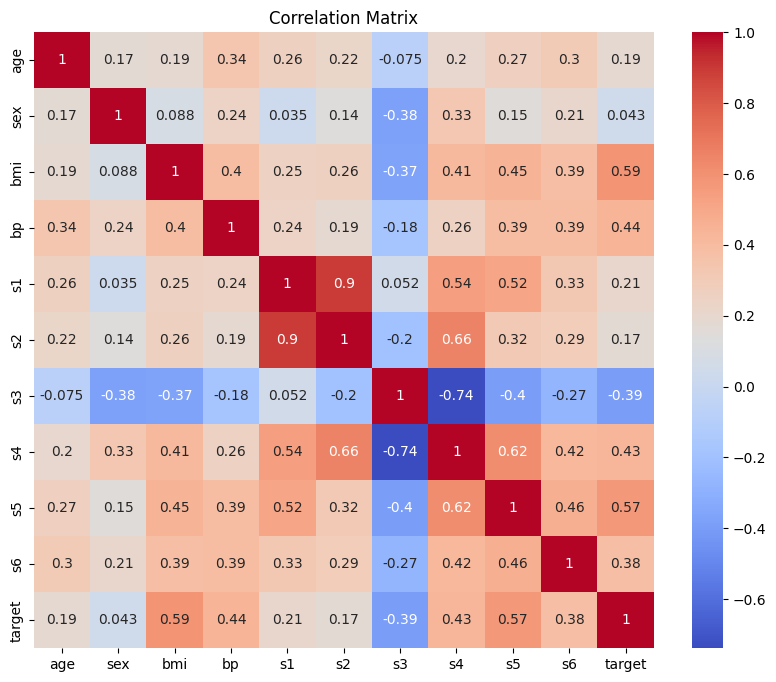

Features Most Coorelated with Target:
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [9]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select features with high correlation
correlated_features = correlation_matrix['target'].sort_values(ascending=False)
print("Features Most Coorelated with Target:\n", correlated_features)

### 相互情報量

In [18]:
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Calculate mutual information
mutual_info = mutual_info_regression(X, y)

"""
    mutual_info_regression(X, y)
    入力データ X の各特徴量と連続的な目的変数 y の間の「相互情報量（Mutual Information）」を推定。
    相互情報量：2つの変数間の依存関係（片方を知ることでどれだけもう一方が予測しやすくなるか）を測る指標。
    値が大きいほど依存関係が強く、MI=0のとき2つの変数は独立。
"""

# Create a dataframe for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, "Mutual Information": mutual_info})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

print("Mutual Information Scores:\n", mi_df)

Mutual Information Scores:
   Feature  Mutual Information
2     bmi            0.178940
8      s5            0.145966
9      s6            0.108265
7      s4            0.090604
6      s3            0.067892
4      s1            0.062505
3      bp            0.054083
1     sex            0.039919
5      s2            0.012932
0     age            0.000000


### 特徴量重要度

In [21]:
# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_
"""
RandomForestRegressor.feature_importances_
各特徴量がモデルの予測にどれだけ貢献したか（重要度）を示す属性。
モデルをfit（学習）した後、feature_importances_によって特徴量ごとのスコアが得られ、
スコアが高いほど、該当する特徴量が予測に与える影響が大きいことを意味する。

各決定木の分岐（ノード分割）で“どれだけ不純度（impurity）を減らしたか”を全ての木・全ての分岐で集計し、平均することで重要度を計算。
この値を用いることで、予測に役立つ特徴量や、重要度が低い特徴量の選別が可能。
"""
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance from Random Forest:\n", importance_df)


Feature Importance from Random Forest:
   Feature  Importance
8      s5    0.315629
2     bmi    0.276249
3      bp    0.087085
9      s6    0.070775
0     age    0.057496
5      s2    0.055368
6      s3    0.051191
4      s1    0.047251
7      s4    0.027056
1     sex    0.011901


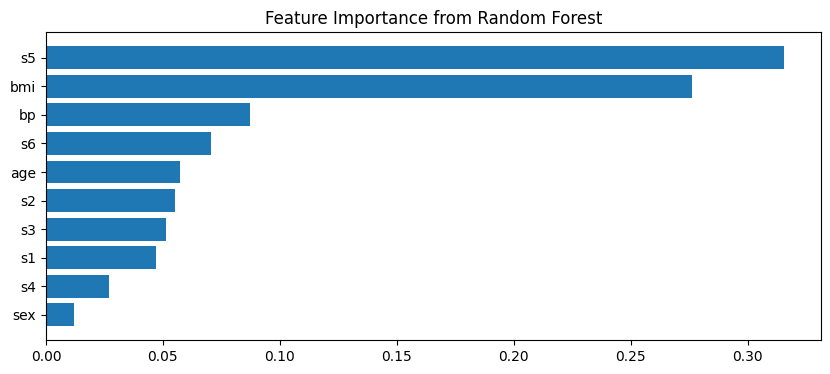

In [23]:
# Plot feature importance
plt.figure(figsize=(10,4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.show()